In [2]:
from ias import RandomForest, PCA, split_dataset
from ias.Datasets import Emnist
from ias.Metrics import accuracy_score, confusion_matrix, show_confusion_matrix

In [3]:
emnist_train_x, emnist_train_y, emnist_test_x, emnist_test_y = split_dataset(1000, Emnist)

In [4]:
pca = PCA(0.90)
pca.fit(emnist_train_x)

In [5]:
emnist_compressed_train_x = pca.compress(emnist_train_x)
emnist_compressed_test_x = pca.compress(emnist_test_x)

In [6]:
emnist_tree = RandomForest(tree_number=100, training_subset_size=250, do_bagging=True)
emnist_tree.fit(emnist_compressed_train_x, emnist_train_y)

Accuracy score : 0.826


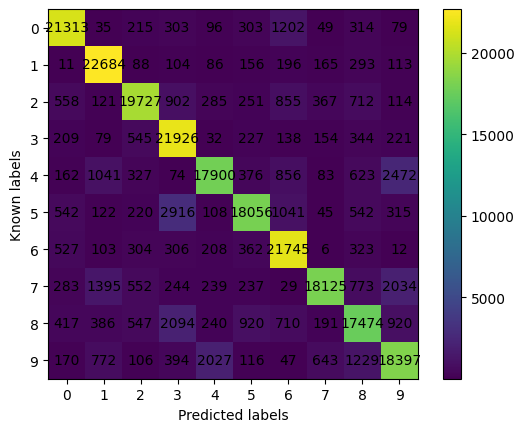

In [7]:
emnist_prediction_y = emnist_tree.predict(emnist_compressed_test_x)

emnist_conf_matrix = confusion_matrix(Emnist.class_number, emnist_test_y, emnist_prediction_y)
show_confusion_matrix(emnist_conf_matrix, Emnist.class_names)
print(f"Accuracy score : {accuracy_score(emnist_test_y, emnist_prediction_y):.3f}")

Accuracy score : 0.996


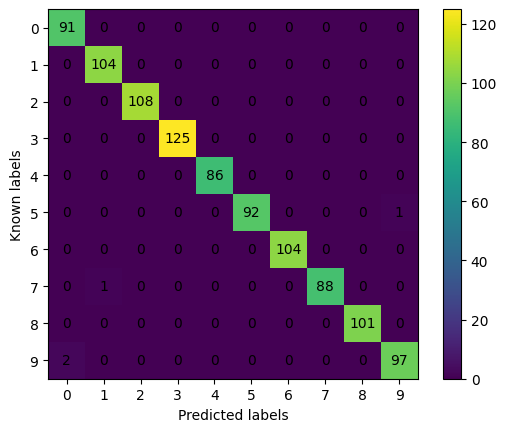

In [8]:
emnist_prediction_trained_y = emnist_tree.predict(emnist_compressed_train_x)

emnist_conf_matrix = confusion_matrix(Emnist.class_number, emnist_train_y, emnist_prediction_trained_y)
show_confusion_matrix(emnist_conf_matrix, Emnist.class_names)
print(f"Accuracy score : {accuracy_score(emnist_train_y, emnist_prediction_trained_y):.3f}")